In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['font.serif'] = ['SimHei']
import seaborn as sns
%matplotlib inline
p = sns.color_palette()
sns.set_style("darkgrid",{"font.sans-serif":['simhei', 'Arial']})

# 初始化训练集

In [2]:
loan_time_train = pd.read_csv("D:/Files/QQFiles/935257580/FileRecv/personal loan/newtodo/loan_time.txt",header=None,names=['u_id','loan_time'])
loan_time_train['loan_time'] = loan_time_train['loan_time'] // 86400 

In [3]:
user_info_train = pd.read_csv("D:/Files/QQFiles/935257580/FileRecv/personal loan/newtodo/user_info.txt",header=None,
                        names=['u_id','u_sex','u_job','u_edu','u_mrg','u_act'])

In [4]:
bill_detail_train = pd.read_csv("D:/Files/QQFiles/935257580/FileRecv/personal loan/newtodo/bill_detail.txt",header=None,
                        names=['u_id','time','b_id','pre_money','pre_repay','credit_amount','now_remain','now_least_pay',
                               'csm_num','now_money','adjust_my','cycle_ist','alb_remain','brw_amt','rpy_status'])
bill_detail_train['time'] = bill_detail_train['time'] // 86400
bill_detail_train = pd.merge(bill_detail_train,loan_time_train,how='inner',on='u_id')

In [5]:
browse_history_train = pd.read_csv("D:/Files/QQFiles/935257580/FileRecv/personal loan/newtodo/browse_history.txt",header=None,
                            names=['u_id','brs_time','brs_data','brs_sub_num'])
browse_history_train['brs_time'] = browse_history_train['brs_time'] // 86400

In [6]:
bank_detail_train = pd.read_csv("D:/Files/QQFiles/935257580/FileRecv/personal loan/newtodo/bank_detail.txt",header=None,
                               names=['u_id','time','csm_type','csm_my','income_mark'])
bank_detail_train['time'] = bank_detail_train['time'] // 86400

In [7]:
train = pd.read_csv("D:/Files/QQFiles/935257580/FileRecv/personal loan/newtodo/over_due.txt",header=None,names=['u_id','overdue'])
train = pd.merge(train,user_info_train,how='inner',on='u_id')
train = pd.merge(train,loan_time_train,how='inner',on='u_id')

In [8]:
# bill_train[(bill_train['time']>bill_train['loan_time'])].groupby(['u_id','time','b_id'],as_index=False)
# train[(train['u_id']==24)]
train

,u_id,overdue,u_sex,u_job,u_edu,u_mrg,u_act,loan_time
0,1,0,1,2,3,1,3,68458
1,2,0,1,2,3,2,1,68458
2,3,0,1,4,4,1,4,68458
3,4,1,1,4,4,3,2,68458
4,5,0,1,2,2,3,1,68458
5,6,1,1,2,4,1,3,68458
6,7,0,1,2,3,3,1,68458
7,8,0,1,2,4,1,2,68458
8,9,0,2,2,3,1,3,68458
9,10,0,1,3,4,3,2,68458


# 初始化测试集

# 探索性数据分析EDA

### user_info 属性分析

In [9]:
sex_relate = train.groupby('u_sex',as_index=False)['overdue'].agg({'overdue':'sum','total':'count'})
sex_relate['sex_od_rate'] = sex_relate['overdue']/sex_relate['total']
sex_relate

,u_sex,overdue,total,sex_od_rate
0,0,108,211,0.511848
1,1,844,8329,0.101333
2,2,99,1460,0.067808


In [10]:
job_relate = train.groupby('u_job',as_index=False)['overdue'].agg({'overdue':'sum','total':'count'})
job_relate['job_od_rate'] = job_relate['overdue']/job_relate['total']
job_relate

,u_job,overdue,total,job_od_rate
0,0,2,7,0.285714
1,1,6,40,0.150000
2,2,741,7575,0.097822
3,3,97,867,0.111880
4,4,205,1511,0.135672


In [11]:
mrg_relate = train.groupby('u_mrg',as_index=False)['overdue'].agg({'overdue':'sum','total':'count'})
mrg_relate['mrg_od_rate'] = mrg_relate['overdue']/mrg_relate['total']
mrg_relate

,u_mrg,overdue,total,mrg_od_rate
0,0,2,8,0.250000
1,1,531,4952,0.107229
2,2,116,1134,0.102293
3,3,373,3627,0.102840
4,4,25,271,0.092251
5,5,4,8,0.500000


In [12]:
edu_relate = train.groupby('u_edu',as_index=False)['overdue'].agg({'overdue':'sum','total':'count'})
edu_relate['edu_od_rate'] = edu_relate['overdue']/edu_relate['total']
edu_relate

,u_edu,overdue,total,edu_od_rate
0,0,2,7,0.285714
1,1,3,53,0.056604
2,2,126,1746,0.072165
3,3,413,4333,0.095315
4,4,507,3861,0.131313


In [13]:
act_relate = train.groupby('u_act',as_index=False)['overdue'].agg({'overdue':'sum','total':'count'})
act_relate['act_od_rate'] = act_relate['overdue']/act_relate['total']
act_relate

,u_act,overdue,total,act_od_rate
0,0,2,7,0.285714
1,1,307,3356,0.091478
2,2,292,2585,0.112959
3,3,191,1836,0.104031
4,4,259,2216,0.116877


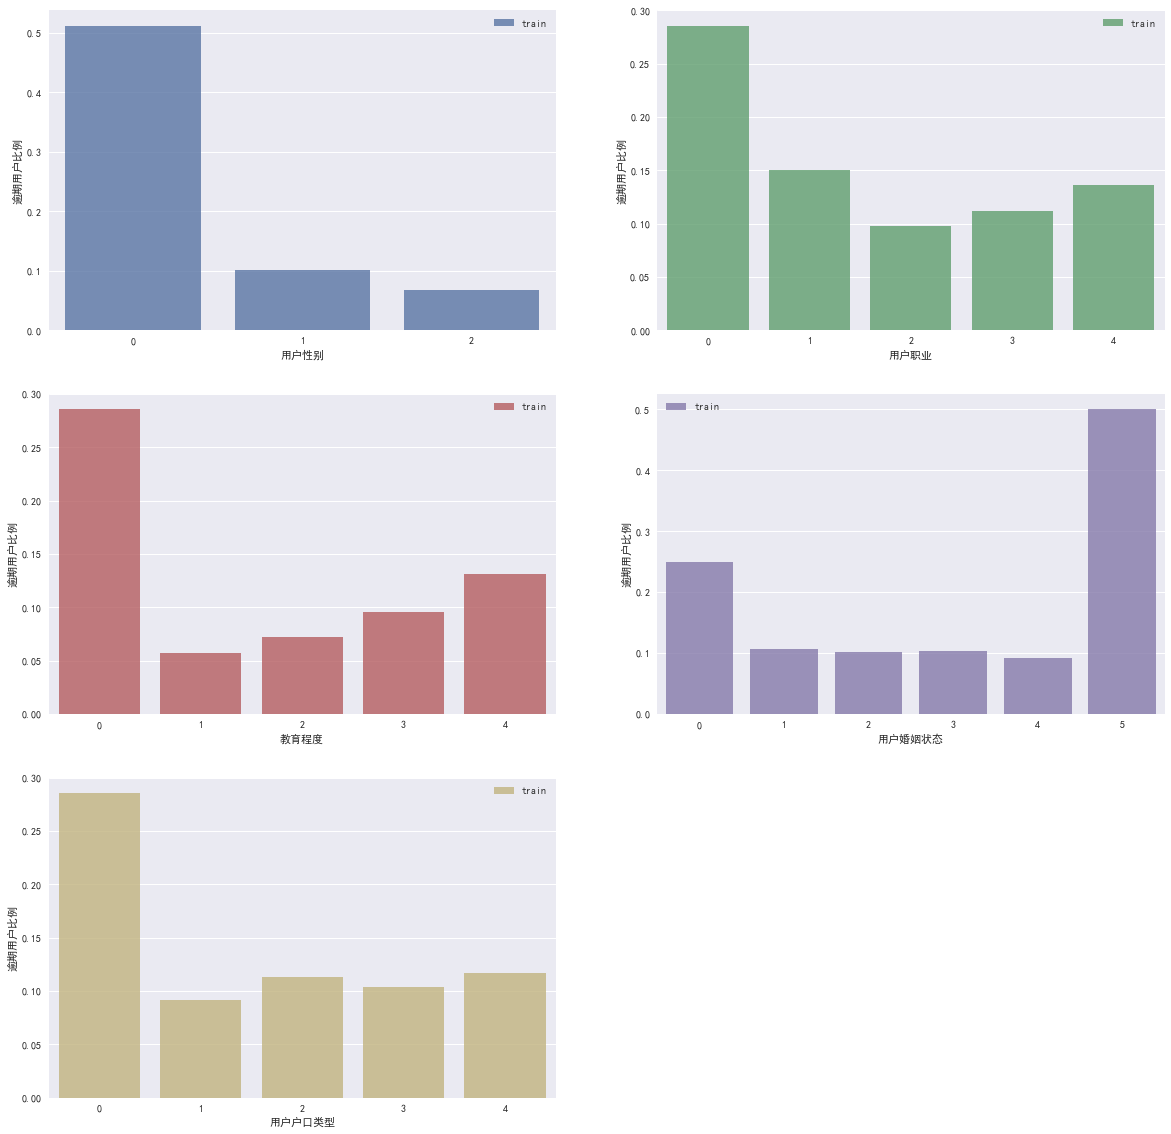

In [14]:
fig = plt.figure(figsize=(20, 20))

ax2 = fig.add_subplot(3, 2, 2)
ax2=sns.barplot(job_relate.index, job_relate.overdue/job_relate.total, alpha=0.8, color=p[1], label='train')
ax2.legend()
#ax2.set_title(u'职业分布情况') 
ax2.set_xlabel(u'用户职业')
ax2.set_ylabel(u'逾期用户比例')

a1 = fig.add_subplot(3, 2, 1)
ax1=sns.barplot(sex_relate.index, sex_relate.overdue/sex_relate.total, alpha=0.8, color=p[0], label='train')
ax1.legend()
#ax1.set_title(u'性别分布情况') 
ax1.set_xlabel(u'用户性别')
ax1.set_ylabel(u'逾期用户比例')

ax3 = fig.add_subplot(3, 2, 3)
ax3=sns.barplot(edu_relate.index, edu_relate.overdue/edu_relate.total, alpha=0.8, color=p[2], label='train')
ax3.legend()
#ax3.set_title(u'教育程度分布') 
ax3.set_xlabel(u'教育程度')
ax3.set_ylabel(u'逾期用户比例')

ax4 = fig.add_subplot(3, 2, 4)
ax4=sns.barplot(mrg_relate.index, mrg_relate.overdue/mrg_relate.total, alpha=0.8, color=p[3], label='train')
ax4.legend()
#ax4.set_title(u'用户婚姻状态') 
ax4.set_xlabel(u'用户婚姻状态')
ax4.set_ylabel(u'逾期用户比例')

ax5 = fig.add_subplot(3, 2, 5)
ax5=sns.barplot(act_relate.index, act_relate.overdue/act_relate.total, alpha=0.8, color=p[4], label='train')
ax5.legend()
#ax5.set_title(u'用户户口类型') 
ax5.set_xlabel(u'用户户口类型')
ax5.set_ylabel(u'逾期用户比例')

plt.show()

### bill_detail 信用卡账单分析

* 单个用户 账单时间 > 放款时间 的账单数

In [15]:
t1 = bill_detail_train[(bill_detail_train['time']>bill_detail_train['loan_time'])].groupby('u_id',as_index=False)
t2 = bill_detail_train[(bill_detail_train['time']>bill_detail_train['loan_time']+1)].groupby('u_id',as_index=False)
t3 = bill_detail_train[(bill_detail_train['time']>bill_detail_train['loan_time']+2)].groupby('u_id',as_index=False)

In [16]:
x=t1['time'].apply(lambda x:np.unique(x).size)
x1=t1['time'].agg({'t1' : 'count'})
x1['x1']=x

x=t2['time'].apply(lambda x:np.unique(x).size)
x2=t2['time'].agg({'t2' : 'count'})
x2['x2']=x

x=t3['time'].apply(lambda x:np.unique(x).size)
x3=t3['time'].agg({'t3' : 'count'})
x3['x3']=x

In [17]:
train = pd.merge(train,x1,how='left',on='u_id')
train = pd.merge(train,x2,how='left',on='u_id')
train = pd.merge(train,x3,how='left',on='u_id')
train = train.fillna(0)

In [18]:
d=train
l0_x1=d[(d['overdue']==0)].groupby("x1",as_index=False)
l1_x1=d[(d['overdue']==1)].groupby("x1",as_index=False)

l0_x1=l0_x1['x1'].agg({'l0_x1' : 'count'})#标签为0
l1_x1=l1_x1['x1'].agg({'l1_x1' : 'count'})#标签为1

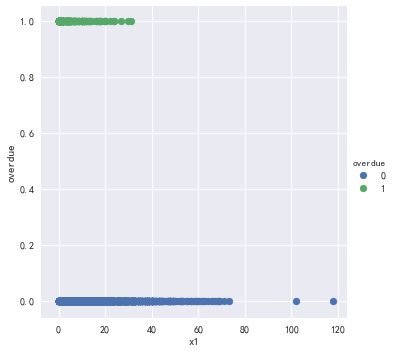

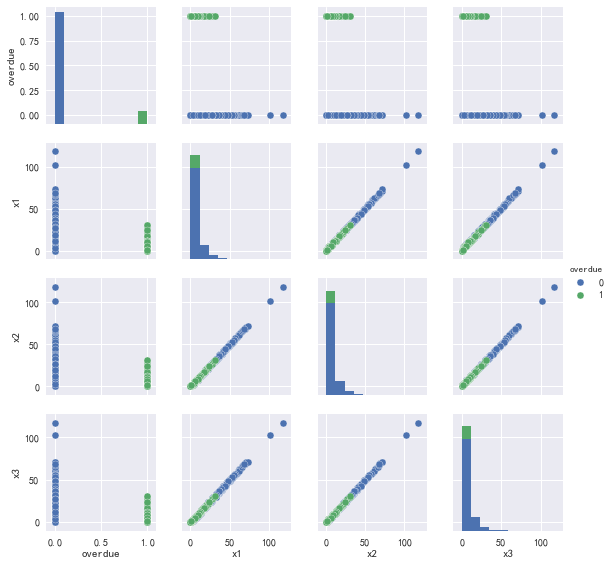

In [19]:

#l1_x1.plot(kind="scatter", x="x1", y="l1_x1")
#l0_x1.plot(kind="scatter", x="x1", y="l0_x1")
#d.plot(kind="scatter", x="x1", y="overdue")
#sns.jointplot(x="x1", y="overdue", data=d, size=5)

sns.FacetGrid(d, hue="overdue", size=5).map(plt.scatter, "x1", "overdue").add_legend()
xxx=d[['overdue','x1','x2','x3']]
sns.pairplot(xxx, hue="overdue", size=2)

### bank_detail 银行流水记录分析

* 统计用户总（或部分月份）支出与收入的差值

In [20]:
bank_detail_train_adj = pd.merge(bank_detail_train,loan_time_train,how='left',on = "u_id")

In [21]:
u_out=bank_detail_train_adj[(bank_detail_train_adj['csm_type']==1)].groupby("u_id",as_index=False)
u_in=bank_detail_train_adj[(bank_detail_train_adj['csm_type']==0)].groupby("u_id",as_index=False)
u_wage_in=bank_detail_train_adj[(bank_detail_train_adj['income_mark']==1)].groupby("u_id",as_index=False)

In [22]:
u_out=u_out['csm_my'].agg({'u_out' : 'sum'})
u_in=u_in['csm_my'].agg({'u_in' : 'sum'})
u_wage_in=u_wage_in['csm_my'].agg({'u_wage_in' : 'sum'})

In [23]:
统计表 = train

In [24]:
统计表 = pd.merge(统计表, u_out, how='left',on='u_id')
统计表 = pd.merge(统计表, u_in, how='left', on='u_id')
统计表 = pd.merge(统计表, u_wage_in, how='left', on='u_id')

In [25]:
统计表 = 统计表.fillna(0)
统计表['difference']=统计表['u_out']-统计表['u_in']

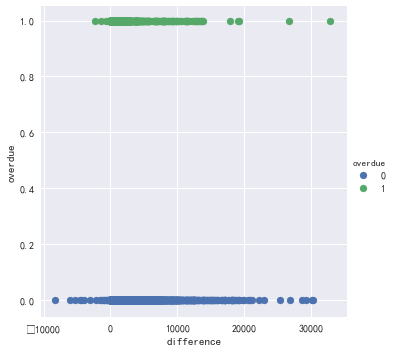

In [26]:
sns.FacetGrid(统计表, hue="overdue", size=5).map(plt.scatter, "difference", "overdue").add_legend()

# 特征可视化

In [27]:
trains = pd.read_csv("D:/Files/QQFiles/935257580/FileRecv/personal loan/feature/bill_prifeature_train.csv",encoding="gb2312")
tests = pd.read_csv("D:/Files/QQFiles/935257580/FileRecv/personal loan/feature/test.csv",encoding="gb2312")
训练表 = pd.read_csv("D:/Files/QQFiles/935257580/FileRecv/personal loan/newtodo/over_due.txt",header=None,names=['用户标识','标签'])

trains = pd.merge(trains,训练表,how='inner',on = "用户标识")

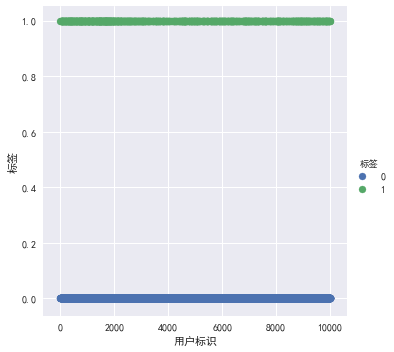

In [28]:
sns.FacetGrid(trains, hue="标签", size=5).map(plt.scatter, "用户标识", "标签").add_legend()

In [29]:
# sns.FacetGrid(trains, hue="标签", size=5).map(plt.scatter, "放款前账单还款差额", "标签").add_legend()
# xxx=trains[['标签','放款前账单还款差额','放款后账单还款差额','放款前账单最大值还款差额(去重)','放款后账单最大值还款差额(去重)']]
# sns.pairplot(xxx, hue="标签", size=5)

## KS测评

In [30]:
from sklearn import metrics
def ks(y_predicted, y_true):
    label=y_true
    #label = y_true.get_label()
    fpr,tpr,thres = metrics.roc_curve(label,y_predicted,pos_label=1)
    return 'ks',abs(fpr - tpr).max()

# 特征集评测

In [31]:
统计表=pd.merge(统计表, sex_relate,how='inner', on = 'u_sex')
统计表=pd.merge(统计表, job_relate,how='inner', on = 'u_job')
统计表=pd.merge(统计表, mrg_relate,how='inner', on = 'u_mrg')
统计表=pd.merge(统计表, edu_relate,how='inner', on = 'u_edu')
统计表=pd.merge(统计表, act_relate,how='inner', on = 'u_act')

In [32]:
预测表=统计表
预测表['bank预测']=预测表['difference']
预测表['bank预测']=预测表['bank预测']-min(预测表['bank预测'])
预测表['bank预测']=预测表['bank预测']/max(预测表['bank预测'])

In [33]:
预测表['bill预测']=-(预测表['x1']+1)*(预测表['x2']+1)*(预测表['x3']+1)
预测表['bill预测']=预测表['bill预测']-min(预测表['bill预测'])
预测表['bill预测']=预测表['bill预测']/max(预测表['bill预测'])

In [34]:
预测表['user预测']=0.1*预测表['job_od_rate']+0.3*预测表['mrg_od_rate']+0.1*预测表['edu_od_rate']+0.1*预测表['act_od_rate']+0.4*预测表['sex_od_rate']

In [35]:
预测表['预测']=预测表['bill预测']+0.1*预测表['bank预测']+0.3*预测表['user预测']

In [37]:
预测表

,u_id,overdue_x,u_sex,u_job,u_edu,u_mrg,u_act,loan_time,t1,x1,...,overdue_x,total_y,edu_od_rate,overdue_y,total,act_od_rate,bank预测,bill预测,user预测,预测
0,1,0,1,2,3,1,3,68458,0.0,0.0,...,413,4333,0.095315,191,1836,0.104031,0.210889,1.000000,0.102419,1.051814
1,11,0,1,2,3,1,3,68458,0.0,0.0,...,413,4333,0.095315,191,1836,0.104031,0.201380,1.000000,0.102419,1.050864
2,45,0,1,2,3,1,3,68458,0.0,0.0,...,413,4333,0.095315,191,1836,0.104031,0.201380,1.000000,0.102419,1.050864
3,46,0,1,2,3,1,3,68458,5.0,5.0,...,413,4333,0.095315,191,1836,0.104031,0.256804,0.999871,0.102419,1.056277
4,47,0,1,2,3,1,3,68458,22.0,20.0,...,413,4333,0.095315,191,1836,0.104031,0.373909,0.994458,0.102419,1.062575
5,115,0,1,2,3,1,3,68459,0.0,0.0,...,413,4333,0.095315,191,1836,0.104031,0.201380,1.000000,0.102419,1.050864
6,125,0,1,2,3,1,3,68459,4.0,2.0,...,413,4333,0.095315,191,1836,0.104031,0.201380,0.999984,0.102419,1.050848
7,131,0,1,2,3,1,3,68459,34.0,24.0,...,413,4333,0.095315,191,1836,0.104031,0.227830,0.990650,0.102419,1.044158
8,153,0,1,2,3,1,3,68459,27.0,21.0,...,413,4333,0.095315,191,1836,0.104031,0.250724,0.993628,0.102419,1.049426
9,166,0,1,2,3,1,3,68459,3.0,3.0,...,413,4333,0.095315,191,1836,0.104031,0.210548,0.999962,0.102419,1.051743


In [36]:
print(ks(预测表['bill预测'],预测表['标签']))
print(ks(预测表['bank预测'],预测表['标签']))
print(ks(预测表['user预测'],预测表['标签']))
print(ks(预测表['预测'],预测表['标签']))

KeyError: '标签'